In [1]:
from coptpy import *

As shown in the image in (1),'P' represents 'Plant', 'P1' represents 'period1', and so on. 'A1' represents A in the first period, and so on. 'S' represents 'Sales'.<br/>
Denote the set of nodes other than the origin 'P' and destination 'S' as **Nodes**, the set of arcs as **Arcs**, the cost of transporting per unit on Arcs as **cost**, and the upper bound of the transportation volume on Arcs as **ub1**.

In [2]:
Nodes=['P1','P2','P3','A1','B1','C1','A2','B2','C2','A3','B3','C3']

In [3]:
Arcs,cost,ub1 = multidict({
    ('P','P1'):[8,175],
    ('P','P2'):[10,200],
    ('P','P3'):[11,150],
    ('P1','P2'):[1,100],
    ('P2','P3'):[1,100],
    ('P1','A1'):[4,COPT.INFINITY],
    ('P1','B1'):[6,COPT.INFINITY],
    ('P1','C1'):[8,COPT.INFINITY],
    ('P2','A2'):[4,COPT.INFINITY],
    ('P2','B2'):[6,COPT.INFINITY],
    ('P2','C2'):[8,COPT.INFINITY],
    ('P3','A3'):[4,COPT.INFINITY],
    ('P3','B3'):[6,COPT.INFINITY],
    ('P3','C3'):[8,COPT.INFINITY],
    ('A1','S'):[-15,50],
    ('B1','S'):[-20,100],
    ('C1','S'):[-14,75],
    ('A2','S'):[-18,75],
    ('B2','S'):[-17,150],
    ('C2','S'):[-21,75],
    ('A3','S'):[-15,20],
    ('B3','S'):[-18,80],
    ('C3','S'):[-17,50],
    ('P','S'):[0,COPT.INFINITY]})

In [4]:
# Create environment
env = Envr()
# Create model 
model = env.createModel(name="MCNF_a")

Cardinal Optimizer v5.0.4. Build date Aug 19 2022
Copyright Cardinal Operations 2022. All Rights Reserved



**Decision variables**:<br/> 
$x_{ij}$: transportation volume from i to j, where $x_{ij}$ satisfies the condition $0\leq x_{ij} \leq u_{ij}, (i,j)∈Arcs$, <br/>
The data of $u_{ij}$ is stored in **ub1**.

In [5]:
#Add variables
transport = model.addVars(Arcs,ub=ub1)

The total capacity of the plant during three periods is 525(175+200+150) units. The sum of maximum Sales from outlets is 675(50+100+75+75+150+75+20+80+50) units. Therefore, the maximum balance between production and sales that can be achieved is 525.<br/>
So the outflow at the origin is equal to 525, the inflow at the destination is equal to 525, and the inflow at the remaining nodes is equal to the outflow.<br/>
**Constraints**:
$$\sum_{(i,j)\in Arcs}x_{ij} - \sum_{(j,i)\in Arcs}x_{ji}=b_i, i\in Nodes,P,S$$
If $i$ is the origin, $b_i$ is 525;
If $i$ is the destination, $b_i$ is − 525;
If $i$ is neither the origin nor the destination, $b_i$ is 0.

In [6]:
#Add Origins constraints:出发地的产量约束
model.addConstr(transport.sum('P',"*") == 525)
#Add Destinations constraints:目的地的需求约束
model.addConstr(-transport.sum("*",'S') == -525)
#Add constraints:其余Nodes的约束，流入=流出
for n in Nodes:
    model.addConstr(transport.sum(n,"*") == transport.sum("*",n))

**Objective function**:<br/>
$$\min_x \sum_{(i,j)\in Arcs}c_{ij}x_{ij}$$
Our goal is to minimize total expenses (maximize profits).

In [7]:
#Set Objective
model.setObjective(transport.prod(cost), sense=COPT.MINIMIZE)

In [8]:
#solve the problem
model.solve()

Model fingerprint: ddde064e

Hardware has 8 cores and 16 threads. Using instruction set X86_NATIVE (1)
Minimizing an LP problem

The original problem has:
    14 rows, 24 columns and 48 non-zero elements
The presolved problem has:
    14 rows, 24 columns and 48 non-zero elements

Starting the simplex solver using up to 8 threads

Method   Iteration           Objective  Primal.NInf   Dual.NInf        Time
Dual             0   -1.1865738594e+04           11           0       0.00s
Dual            12   -1.4547152091e+03            0           0       0.00s

Solving finished
Status: Optimal  Objective: -1.4550000000e+03  Iterations: 12  Time: 0.01s


We've got the optimal solution.

In [9]:
# Analyze solution
if model.status == COPT.OPTIMAL:
    # Optimal objective value
    print("Optimal Value of objective:{:.4f}".format(model.objval))
    allvars = model.getVars()
    #Variable value
    print("\nValue of each variable:")
    for var in allvars:
        print("decision variable{0},optimal solution is {1:.4f}".format(var.name, var.x))    

Optimal Value of objective:-1455.0000

Value of each variable:
decision variableC(P,P1),optimal solution is 175.0000
decision variableC(P,P2),optimal solution is 200.0000
decision variableC(P,P3),optimal solution is 100.0000
decision variableC(P1,P2),optimal solution is 25.0000
decision variableC(P2,P3),optimal solution is 0.0000
decision variableC(P1,A1),optimal solution is 50.0000
decision variableC(P1,B1),optimal solution is 100.0000
decision variableC(P1,C1),optimal solution is 0.0000
decision variableC(P2,A2),optimal solution is 75.0000
decision variableC(P2,B2),optimal solution is 75.0000
decision variableC(P2,C2),optimal solution is 75.0000
decision variableC(P3,A3),optimal solution is 20.0000
decision variableC(P3,B3),optimal solution is 80.0000
decision variableC(P3,C3),optimal solution is 0.0000
decision variableC(A1,S),optimal solution is 50.0000
decision variableC(B1,S),optimal solution is 100.0000
decision variableC(C1,S),optimal solution is 0.0000
decision variableC(A2,S)

**Results**:<br/>
It can be seen from the output results that the minimum cost is -1455(maximum profit is 1440) .The details are shown in the figure below:
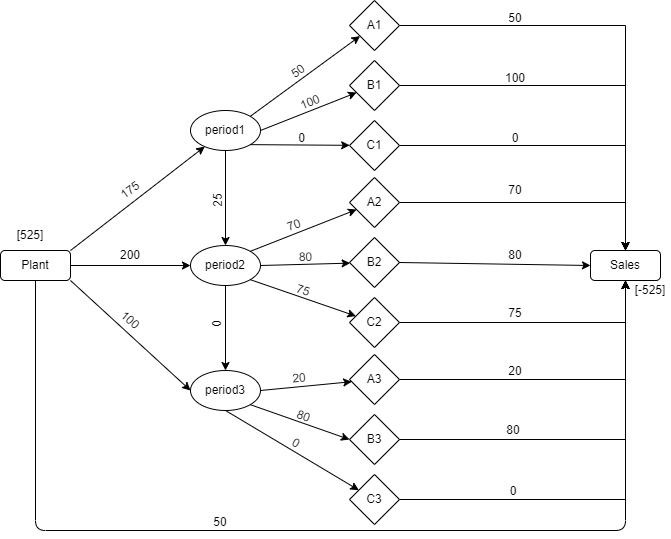